In [1]:
%matplotlib inline 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
from scipy.stats import t as tdist

In [2]:
os.getcwd()

'/Users/sahiljain'

In [3]:
os.chdir("/Users/sahiljain/Downloads")

In [4]:
bikeShare = pd.read_csv('bike_share.csv')

In [5]:
y = bikeShare["count"]
x1 = bikeShare["temp"]
x2 = bikeShare["humidity"]
x3 = bikeShare["windspeed"]
x4 = bikeShare["season"]
x5 = bikeShare["weather"]

In [6]:
## Q1 Construct scatter plots of count versus temp, humidity and 
## windspeed, being sure to appropriately label your axes. In each case 
## describe the linear relationship you observe in terms of ‘direction’
## and ‘strength’. Use the correlation coefficien in each case to 
## formalize this interpretation.

## There will be 3 different scatter plots and the interpretations will 
## be made with respect to the scatter plots.

0.39445364496724911

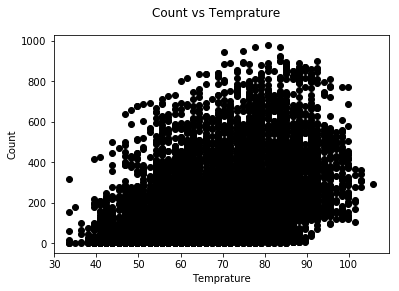

In [7]:
## (i) Scatter Plot of Count vs temprature. 
fig1 = plt.figure()
plt.scatter(x1, y, c = "black")
fig1.suptitle("Count vs Temprature")
plt.ylabel("Count")
plt.xlabel("Temprature")

## correlation between the coefficients 
np.corrcoef(x1,y)[0,1]

In [8]:
## Interpretation : So from the scatter plot and correlation (.3944) 
## of count vs temp we can see that they have a very strong linear 
## relation as value of rho (correlation) is close to 1. From the 
## scatter plot we can see that the cout of bike renting goes up as the 
## temprature rises above 40 degrees fahrenheit.

-0.31737147887659445

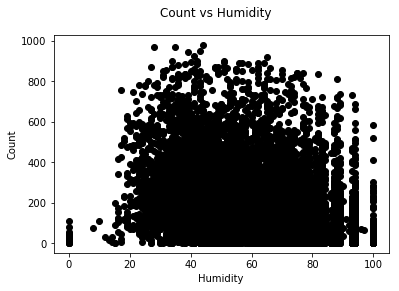

In [9]:
## (ii) Scatter plot of Count vs Humidity 
fig2 = plt.figure()
plt.scatter(x2, y, c = "black")
fig2.suptitle("Count vs Humidity")
plt.ylabel("Count")
plt.xlabel("Humidity")

## correlation between the coefficients 
np.corrcoef(x2,y)[0,1]

In [10]:
## Interpretation : In this case we see that as humidity increseas 
## bike share count decreases. Correlation coefficient between two 
## variables is -0.317 which is closer to -1 hence a stronger linear 
## relationship. Count starts to decrease as humidity starts to go above
## 40%. 

0.10136947021033277

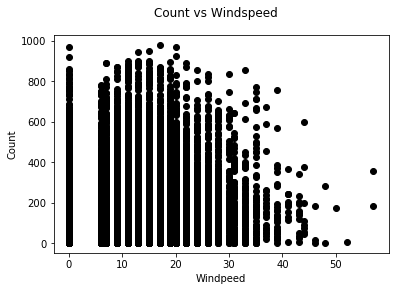

In [11]:
## (iii) Scatter plot between Count vs Windspeed
fig3 = plt.figure()
plt.scatter(x3, y, c = "black")
fig3.suptitle("Count vs Windspeed")
plt.ylabel("Count")
plt.xlabel("Windpeed")

## Correlation between the coefficients 
np.corrcoef(x3,y)[0,1]

In [12]:
## Interpratation : Bike share count increases as windspeed decreases, 
## but count remains somewhat constant upto windspeed ~22 mph, and then 
## starts to decrease as windspeed increases above 22 mph. Correlation 
## coeffiecient for count vs windspeed in .1013 which is a weak linear 
## relation as it is much closer to zero. 

In [13]:
## Q2 For each relationship in part (a) calculate the equation of the 
## line-of-best-fit, treating count as the response variable and temp, 
## humidity and windspeed as explanatory variables. Note that you must use 
## the equations derived in class to perform these calculations. You may,
## however, use automated functions (such as lm() in R and OLS() in 
## (Python)to check your answers.

In [14]:
## Calculating parameters and the line of best fit in each of the previos
## 3 cases. 

In [30]:
## (i) Count vs temp 
beta1a_hat = np.corrcoef(x1,y)[0,1] * np.std(y) / np.std(x1)
beta1a_hat

5.0947447119035711

In [31]:
beta0a_hat = np.mean(y) - beta1a_hat * np.mean(x1)
beta0a_hat

-156.98561782130787

In [32]:
## beta1_hat = 5.094745
## beta0_hat = -156.9856
## Line of best fit (Count vs Temp) : Yi = -156.9856 + 5.094745Xi

In [33]:
## (ii) Count vs Humidity 
beta1b_hat = np.corrcoef(x2,y)[0,1] * np.std(y) / np.std(x2)
beta1b_hat 

-2.9872685785344091

In [34]:
beta0b_hat = np.mean(y) - beta1b_hat * np.mean(x2)
beta0b_hat

376.44560833036167

In [35]:
## beta1_hat = -2.98727
## beta0_hat = 376.445
## Line of best fit (Count vs humidity) : Yi = 376.4456 -2.9872*Xi

In [36]:
## (iii) Count vs Windspeed 
beta1c_hat = np.corrcoef(x3,y)[0,1] * np.std(y) / np.std(x3)
beta1c_hat

2.2490579173365712

In [37]:
beta0c_hat = np.mean(y) - beta1c_hat * np.mean(x3)
beta0c_hat

162.78755033543703

In [38]:
## beta1_hat = 2.249
## beta0_hat = 162.7875
## Line of best fit (Count vs Windspeed) : Yi = 2.249 + 162.7875*Xi

In [39]:
## Q3  Add the fitted regression lines from part (b) to the appropriate 
## scatter plots constructed in part (a) 

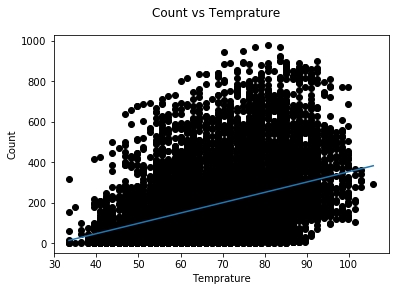

In [40]:
## Add the fitted line to the scatterplot (remake plot first, and then
## line)

## (i) Count vs  Temprature
fig1 = plt.figure()
plt.scatter(x1, y, c = "black")
fig1.suptitle("Count vs Temprature")
plt.ylabel("Count")
plt.xlabel("Temprature")
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y, 1))(np.unique(x1))) ## Stack overflow

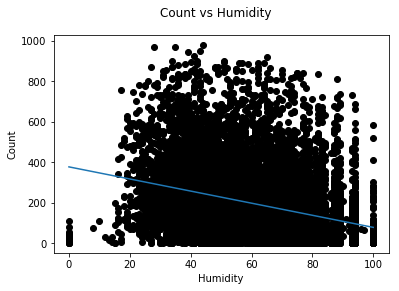

In [41]:
##(ii) Count vs Humidity 

fig2 = plt.figure()
plt.scatter(x2, y, c = "black")
fig2.suptitle("Count vs Humidity")
plt.ylabel("Count")
plt.xlabel("Humidity")
plt.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y, 1))(np.unique(x2)))

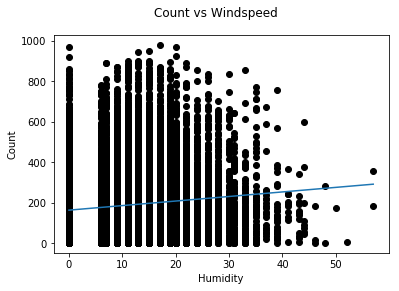

In [42]:
## (iii) 
fig3 = plt.figure()
plt.scatter(x3, y, c = "black")
fig3.suptitle("Count vs Windspeed")
plt.ylabel("Count")
plt.xlabel("Humidity")
plt.plot(np.unique(x3), np.poly1d(np.polyfit(x3, y, 1))(np.unique(x3)))

In [43]:
## Q4  Based on your findings thus far, rank the variables temp, 
## humidity and windspeed in terms of the strength of their relationship 
## with bike rentals, from most weakly associated to most stron

## Ranking : 
## (1) Count vs Windspeed
## (2) Count vs Humidity
## (3) Count vs Temprature

In [46]:
## Q5  Using your lines-of-best-fit calculated in (b), calculate the 
## expected number of bike rentals in hours for which
## (1) the outside temperature is 80 degrees Fahrenheit
## (2) the wind speed is 15 miles per hour
## (3) the relative humidity is 100%

In [47]:
# At temp = 80
x = 80 
mu_hat = beta0a_hat + beta1a_hat * x
mu_hat 

250.59395913097785

In [49]:
# At wind speed = 15 mph 
x = 15 
mu_hat = beta0c_hat + beta1c_hat * x
mu_hat

196.52341909548559

In [51]:
# At humidity 100%
x = 100 
mu_hat = beta0b_hat + beta1b_hat * x
mu_hat

77.718750476920775

In [52]:
# Q6  In each of the cases in part (e) the value of the explanatory 
# variable lies within the range of values actually observed. What risk 
# does one face when predicting outside the range of observed explanatory
# variable values ?

# The risk one person face while predicting outside the range of observed 
# explanatory varibale values is that the model wont be as consistent as 
# compared to predictic within the range. 

In [53]:
# Q7  Construct boxplots of count vs. season and count vs. weather, 
# being sure to appropriately label your axes. Comment on the relationship
# between bike rentals and these two variables.

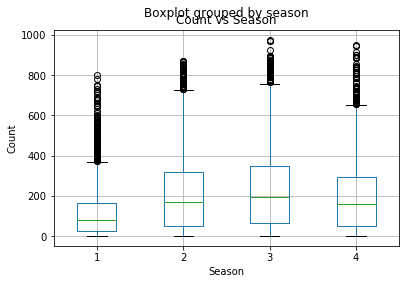

In [54]:
#(i) Count vs Season
boxPlot = bikeShare[["count","season"]].boxplot(by = "season")
boxPlot.set_title('Count vs Season')
boxPlot.set_xlabel('Season')
boxPlot.set_ylabel('Count')

In [55]:
# Interpretation : From the box plot we can interpret this thing that 
# there were more bike rentals in season 1 but the median was less than 
# that of season 2,3 and 4.

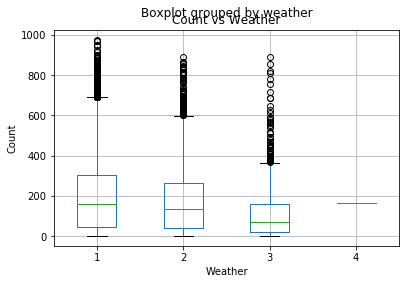

In [56]:
#(ii) Count vs Weather
boxPlot = bikeShare[["count","weather"]].boxplot(by = "weather")
boxPlot.set_title('Count vs Weather')
boxPlot.set_xlabel('Weather')
boxPlot.set_ylabel('Count')

In [57]:
# Interpretation : Weather 3 had the most of number of rentals as 
# compared to weather 1 and 2, however weather 1 and 3 have high median 
# value as compared to weather 3. Whereas 4 has least number of bike 
# rentals because it was stormy weather. 

In [58]:
# Q8  Using automated functions (such as lm() in R and OLS() in Python) 
# fit a simple linear regression model between count, and each of season 
# and weather. Interpret the regressioncoefficients in each case.
# Do these interpretations seem practically useful? 

In [59]:
#(i) Linear model of count and seasons
lm = smf.OLS(y, sm.tools.tools.add_constant(x4),)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     298.7
Date:                Sun, 10 Sep 2017   Prob (F-statistic):           4.76e-66
Time:                        19:31:01   Log-Likelihood:                -71898.
No. Observations:               10886   AIC:                         1.438e+05
Df Residuals:                   10884   BIC:                         1.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.0872      4.211     29.705      0.000     116.833     133.342
season        26.5246      1.535     17.283      0.000      23.516      29.533
==============================================================================
Omnibus:                     2041.415   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3536.912
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       4.349   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Interpretation : From the model it looks like depending upon the 
# season bike rentals vary. For instance in season 1 or 2 the number 
# would be greater as compared to season 3 or 4. 

In [61]:
#(ii) Linear model of count vs season 
lm = smf.OLS(y, sm.tools.tools.add_constant(x5),)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sun, 10 Sep 2017   Prob (F-statistic):           2.11e-41
Time:                        19:31:07   Log-Likelihood:                -71955.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10884   BIC:                         1.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.7273      4.221     57.748      0.000     235.454     252.000
weather      -36.7683      2.717    -13.535      0.000     -42.093     -31.443
==============================================================================
Omnibus:                     2024.230   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3476.744
Skew:                           1.220   Prob(JB):                         0.00
Kurtosis:                       4.309   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Interpretation : In the regression result of count vs weather, it 
#seems like number of bike rentals depends upon the weather. Depending 
#on what number 1,2,3 or 4 depicts the bike rentals vary. 
#In both of the above cases the interpretations are not practically 
#useful. 

In [63]:
# Q9 Explain why the linear regressions in part (h) are inappropriate. 
# Suggest an alternative approach that would be more appropriate 

# The linear model in part (h) is inappropriate because the these 
# variables make the model inconsisten and hard to interpret the model 
# in a proper way. 